# Lab Exercise 04: Fourier Transform and Filtering
## Objective:

In this lab, you will:

1. Generate a synthetic Gaussian ripple pattern.
2. Apply the Fast Fourier Transform (FFT) to the synthetic data and observe its frequency domain representation.
3. Add regular horizontal scanlines to the data to simulate periodic noise.
4. Apply FFT to the noisy data and compare the results
5. Apply a filter in the frequency domain to remove the scanlines and restore the cleaned image.
   
**Answer** this notebook by updating the **Answers for Part. x** cell by **double clicking and typing your answers in a cell**. After finishing this notebook, upload in your github repository (**meteo203-2425-lastname/exercises/exercise_04_fouriertransform_noisefiltering.ipynb**)

### Part 1: Generate Synthetic Gaussian-Weighted Ripple Data
#### Task 1: Create and Plot Gaussian-Weighted Ripple Data

You will first generate a Gaussian-weighted ripple pattern. This simulates a smooth sinusoidal pattern with more intensity at the center that gradually tapers off.

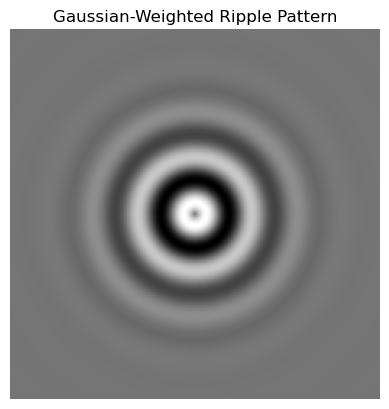

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points (like an image matrix)
rows, cols = 256, 256  # Size of the synthetic image
x = np.linspace(-5, 5, cols)
y = np.linspace(-5, 5, rows)
X, Y = np.meshgrid(x, y)

# Generate ripple pattern using a 2D sinusoidal function
ripple = np.sin(np.sqrt(X**2 + Y**2) * 5)  # Adjust frequency of ripples with multiplier

# Generate a 2D Gaussian envelope
sigma = 1.5  # Standard deviation of the Gaussian
gaussian_envelope = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Apply the Gaussian envelope to the ripple pattern
gaussian_ripple = ripple * gaussian_envelope

# Plot the synthetic Gaussian-weighted ripple data
plt.imshow(gaussian_ripple, cmap='gray')
plt.title('Gaussian-Weighted Ripple Pattern')
plt.axis('off')
plt.show()


#### Questions:

1. How does the Gaussian weighting affect the appearance of the ripple pattern?
2. In what types of meteorological or geophysical data might you encounter a similar Gaussian distribution?

### Answers:
1. The gaussian weighting affect determines how large each ripple is. Each ripple has a different weight depending on the values of the point. This makes that each ripple is less defined for its peaks, basically the sharpness is reduced.
2. Meteorological phenomenas that are similar to the gaussian distribution are wind speeds and temperature variations.

--- 
### Part 2: Apply FFT to the Gaussian Ripple Pattern
#### Task 2: Perform FFT on the Gaussian Ripple Data

You will now apply the Fast Fourier Transform (FFT) to the Gaussian ripple pattern and observe its frequency domain representation.

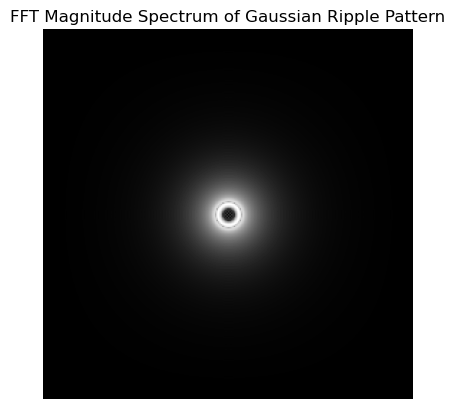

In [4]:
from numpy.fft import fft2, fftshift

# Apply 2D FFT to the Gaussian-weighted ripple data
fft_gaussian_ripple = fft2(gaussian_ripple)

# Shift the zero-frequency component to the center of the spectrum
fft_gaussian_ripple_shifted = fftshift(fft_gaussian_ripple)

# Compute the magnitude spectrum
magnitude_spectrum_gaussian_ripple = np.log(np.abs(fft_gaussian_ripple_shifted) + 1)

# Plot the magnitude spectrum of the FFT of the Gaussian ripple
plt.imshow(magnitude_spectrum_gaussian_ripple, cmap='gray')
plt.title('FFT Magnitude Spectrum of Gaussian Ripple Pattern')
plt.axis('off')
plt.show()


### Questions:

1. How does the FFT magnitude spectrum represent the spatial pattern of the ripple?
2. Where are the low and high frequencies located in the FFT?

### Answers:

1. The FFT defines that the ripple patterns are representative of wavenumbers.
2. The low frequency is congregated at the center, where it is a large area with low resolution. While the high frequency is at the edges,where it is a thin but sharp line, indentifying it as high resolution.

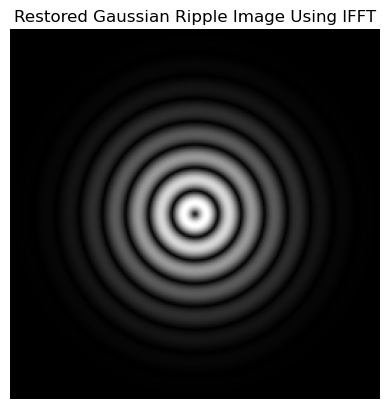

In [18]:
from numpy.fft import ifft2, ifftshift

# Perform inverse FFT shift to move the zero-frequency component back to its original position
ifft_shifted = ifftshift(fft_gaussian_ripple_shifted)

# Apply the inverse FFT to restore the image from the frequency domain
restored_gaussian_image = np.abs(ifft2(ifft_shifted))

# Display the restored image
plt.imshow(restored_gaussian_image, cmap='gray')
plt.title('Restored Gaussian Ripple Image Using IFFT')
plt.axis('off')
plt.show()


---
### Part 3: Restore the Gaussian Ripple Image Using Inverse FFT (IFFT)
#### Task 3: Perform Inverse FFT to Restore the Image

In this task, you will use the Inverse Fast Fourier Transform (IFFT) to convert the frequency domain representation of the Gaussian ripple pattern back to the spatial domain. This will allow you to verify that the transformation is correct and that the original image can be reconstructed.

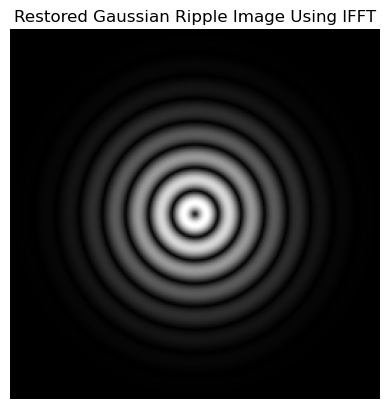

In [6]:
from numpy.fft import ifft2, ifftshift

# Perform inverse FFT shift to move the zero-frequency component back to its original position
ifft_shifted = ifftshift(fft_gaussian_ripple_shifted)

# Apply the inverse FFT to restore the image from the frequency domain
restored_gaussian_image = np.abs(ifft2(ifft_shifted))

# Display the restored image
plt.imshow(restored_gaussian_image, cmap='gray')
plt.title('Restored Gaussian Ripple Image Using IFFT')
plt.axis('off')
plt.show()


### Questions:

1. How does the restored image compare to the original Gaussian ripple pattern?
2. Were there any artifacts introduced during the FFT and IFFT process?

### Answers 
1. The colors are basically inverted, with the grays being blacks and blacks being grays. However, more patterns are now much more visible compared to the original image.
2. I believe that there are no artifacs introduced in this process as the images are similar.

---

### Part 4: Add Horizontal Scanlines to the Gaussian Ripple Data
#### Task 4: Add Regular Horizontal Scanlines

Next, you will add horizontal scanlines to the Gaussian ripple pattern to simulate periodic noise, like what might occur in real-world imaging or data acquisition systems.

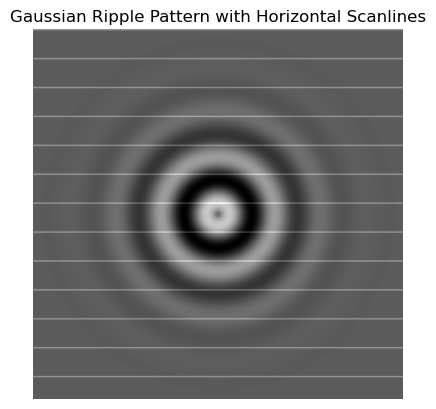

In [19]:
# Add horizontal scanlines (regularly spaced horizontal lines)
gaussian_ripple_with_scanlines = gaussian_ripple.copy()
scan_dist = 20
gaussian_ripple_with_scanlines[::scan_dist, :] += 0.5  # Add scanlines every 10th row with an intensity increase

# Plot the Gaussian ripple data with horizontal scanlines
plt.imshow(gaussian_ripple_with_scanlines, cmap='gray')
plt.title('Gaussian Ripple Pattern with Horizontal Scanlines')
plt.axis('off')
plt.show()


### Questions:

1. How do the horizontal scanlines affect the appearance of the Gaussian ripple pattern in the spatial domain?
2. How might these scanlines resemble real-world periodic noise?

### Answers: 
1. Scanlines introduce an obstacle that basically hinders clear and concise observation and distorts the image.
2. Instruments that develop such images might introduce scanlines due to the falling integrity of the instrument, or the distortions in the data captured.

---
### Part 5: Apply FFT to the Gaussian Ripple with Scanlines
#### Task 5: Perform FFT on the Gaussian Ripple with Scanlines

Now, apply the FFT to the Gaussian ripple pattern with scanlines and observe how the noise appears in the frequency domain.

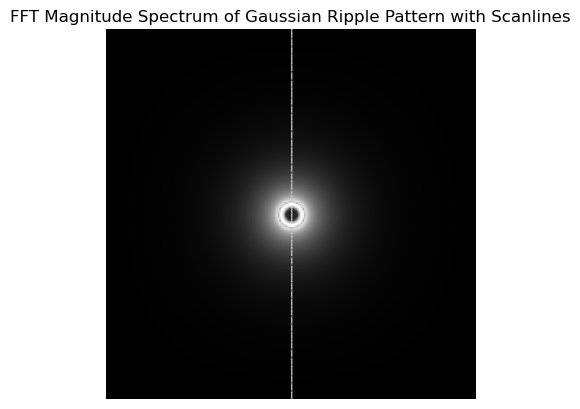

In [9]:
# Apply 2D FFT to the Gaussian ripple data with scanlines
fft_gaussian_ripple_scanlines = fft2(gaussian_ripple_with_scanlines)

# Shift the zero-frequency component to the center of the spectrum
fft_gaussian_ripple_scanlines_shifted = fftshift(fft_gaussian_ripple_scanlines)

# Compute the magnitude spectrum of the FFT with scanlines
magnitude_spectrum_gaussian_scanlines = np.log(np.abs(fft_gaussian_ripple_scanlines_shifted) + 1)

# Plot the magnitude spectrum of the FFT with scanlines
plt.imshow(magnitude_spectrum_gaussian_scanlines, cmap='gray')
plt.title('FFT Magnitude Spectrum of Gaussian Ripple Pattern with Scanlines')
plt.axis('off')
plt.show()


#### Questions:

1. How does the FFT magnitude spectrum of the Gaussian ripple with scanlines compare to the version without scanlines?
2. Where do the frequencies associated with the scanlines appear in the frequency domain?

### Answers: 
1. The image without scanlines delivers a complete picture of the data, while the image with scanlines introduce interference for accurately analyzing the picture.
2. In the image generated, it is only vertical.

---
### Part 6: Filter the FFT to Remove Scanlines and Restore the Image
#### Task 6: Apply Vertical Band-Stop Filter to Remove Scanlines

We will now apply a vertical band-stop filter to remove the scanline frequencies in the FFT and then restore the image.

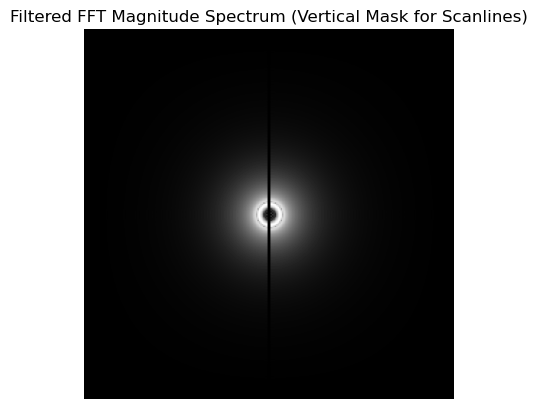

In [10]:
# Create a vertical band-stop mask to filter out scanline frequencies
rows, cols = gaussian_ripple_with_scanlines.shape
crow, ccol = rows // 2 , cols // 2  # Center of the FFT

# Create a mask with ones everywhere (no filtering initially)
mask = np.ones((rows, cols), dtype=np.uint8)

# Define the width of the vertical band to be filtered
band_width = 1  # Adjust based on the appearance of the scanlines in the FFT

# Vertical band-stop filter (filtering horizontal frequencies that cause vertical artifacts)
mask[:, ccol-band_width:ccol+band_width] = 0  # Zero out a vertical band in the FFT

# Apply the mask to the FFT with scanlines
filtered_fft_gaussian_scanlines = fft_gaussian_ripple_scanlines_shifted * mask

# Compute and display the filtered magnitude spectrum
filtered_magnitude_spectrum_gaussian_scanlines = np.log(np.abs(filtered_fft_gaussian_scanlines) + 1)
plt.imshow(filtered_magnitude_spectrum_gaussian_scanlines, cmap='gray')
plt.title('Filtered FFT Magnitude Spectrum (Vertical Mask for Scanlines)')
plt.axis('off')
plt.show()


### Questions:

1. How does the filtered FFT spectrum compare to the original spectrum with scanlines?
2. How effective is the vertical band-stop filter at removing the scanline frequencies?

### Answers: 
1. The filtered FFT spectrum here shows a vertical frequency. However as compared to the original, the interference is less pronounced.
2. The band-stop filter might not completely remove the intereference, however it is severely diminished.

---
### Part 6: Perform Inverse FFT and Normalize the Restored Image
#### Task 6: Perform Inverse FFT and Normalize the Restored Image

Finally, perform the inverse FFT to restore the image and normalize the brightness for better visual clarity.

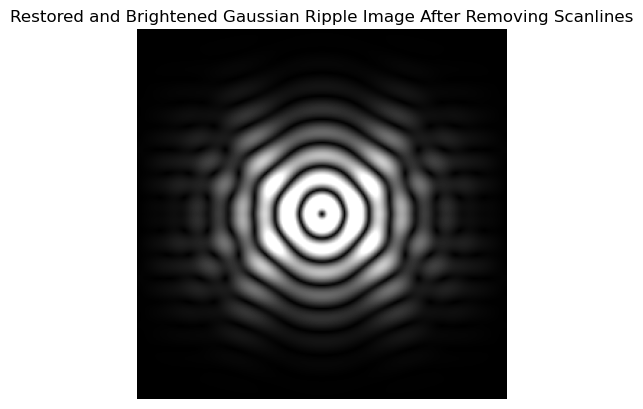

In [11]:
from numpy.fft import ifft2, ifftshift

# Apply inverse shift to move the frequency components back
ifft_shifted = ifftshift(filtered_fft_gaussian_scanlines)

# Apply inverse FFT to get the filtered image
filtered_gaussian_image = np.abs(ifft2(ifft_shifted))

# Normalize the restored image (0 to 1 range)
filtered_gaussian_image_normalized = (filtered_gaussian_image - np.min(filtered_gaussian_image)) / (np.max(filtered_gaussian_image) - np.min(filtered_gaussian_image))

# Optionally, brighten the image by scaling pixel values (e.g., multiply by a constant)
brightness_factor = 1.5
filtered_gaussian_image_brightened = np.clip(filtered_gaussian_image_normalized * brightness_factor, 0, 1)

# Display the brightened restored image
plt.imshow(filtered_gaussian_image_brightened, cmap='gray')
plt.title('Restored and Brightened Gaussian Ripple Image After Removing Scanlines')
plt.axis('off')
plt.show()


### Questions:

1. How does the restored image compare to the original image with scanlines?
2. Were the horizontal scanlines successfully removed by the filter?
3. How did adjusting the brightness affect the final restored image?

### Answers: 
1. The image appears more rippled like turbulent waves.
2. The horizontal lines are still present at the edges, but not as interfering as the original. This however, introduced distortions in the patterns.
3. The image basically darkens the places with horizontal scanlines and introduced distortions in the pattern where there are spots with heavier brightness.

---

### Final Discussion Questions:

1. How does the Gaussian weighting of the ripple pattern affect the distribution of frequencies in the FFT?
2. Why is a vertical band-stop filter effective in removing horizontal scanlines in the frequency domain?
3. How might this approach of Fourier filtering be applied in real-world scenarios, such as removing periodic noise from meteorological or satellite data?

### Answers:

1. The Gaussian weighting basically introduces low frequencies with larger, low resolution ripples, while high frequencies are thinner, sharper, high resolution ripples.
2. The vertical band stop is effective in removing the horizontal scanlines. This helps in a more clear image which improves the accuracy of the data, but introduces distortions in the ripples.
3. Satellite data sometimes tend to have noises in them. Fourier filtering helps in minimizing the interferences for a more concise image.